<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
brcancer= load_breast_cancer() 
print(brcancer.DESCR)

In [5]:
brcancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
brcancer.target[::100]

array([0, 0, 1, 0, 0, 1])

In [7]:
brcancer.data.shape

(569, 30)

In [8]:
brcancer.target.shape

(569,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    brcancer.data, brcancer.target, random_state=11)

In [10]:
X_train.shape


(426, 30)

In [11]:
X_test.shape


(143, 30)

In [12]:
X=brcancer.data
y= brcancer.target

In [13]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier()

In [14]:
predicted = knn.predict(X=X_test)
expected = y_test
predicted[:20]


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [15]:
expected[:20]


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [16]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print (wrong)

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]


In [17]:
print(f'{knn.score(X_test, y_test):.2%}')


94.41%


In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[43,  7],
       [ 1, 92]])

In [19]:
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
import seaborn as sns
 

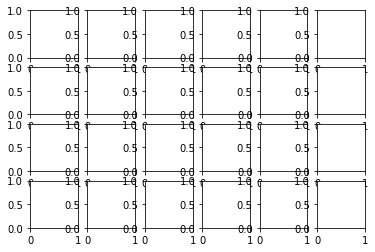

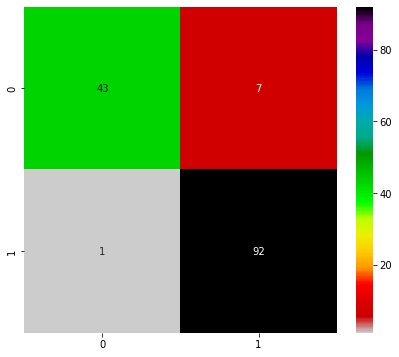

In [20]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r)

In [21]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [22]:
scores = cross_val_score(estimator=knn, X=brcancer.data, y=brcancer.target, cv=kfold)
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [23]:
print(f'Mean accuracy: {scores.mean():.2%}')


Mean accuracy: 92.79%


In [24]:
prev_score = scores.mean()
print (scores.mean())

0.9279135338345865


In [32]:
from sklearn.linear_model import LogisticRegression


In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
     'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'GaussianNB': GaussianNB()}
   

In [27]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=brcancer.data, y=brcancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%


In [34]:
for k in range(1, 20, 2):  
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=brcancer.data, y=brcancer.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=91.39%; standard deviation=2.76%
k=3 ; mean accuracy=92.97%; standard deviation=1.56%
k=5 ; mean accuracy=92.79%; standard deviation=2.01%
k=7 ; mean accuracy=93.32%; standard deviation=2.19%
k=9 ; mean accuracy=93.50%; standard deviation=2.72%
k=11; mean accuracy=92.97%; standard deviation=3.03%
k=13; mean accuracy=93.32%; standard deviation=3.21%
k=15; mean accuracy=92.80%; standard deviation=3.71%
k=17; mean accuracy=92.62%; standard deviation=3.66%
k=19; mean accuracy=92.79%; standard deviation=3.37%
